Overview

Microsoft is looking to make original film content in a new movie studio they have recently created. They are unsure of what kind of content to produce and need help figuring out which kinds of films have done well at the box office. Three seperate dataframes were looked at from multiple databases to come up with three findings and three recommendations. From looking at the sets of data from IMDB and Box Office Mojo, it could be concluded that Adventure and Action were the most frequent genres in the movies that made the most revenue around the world. Looking at the dataset from TMDB, it could be found that the average runtime for the movies with the highest popularity score was around 132 minutes. Finally, looking at the dataset from The Numbers, a positive correlation could be found between the amount of money a studio invests in their budget, and their return in revenue. Microsoft is recommended to make a movie that includes Adventure and Action, is around 132 minutes and invest an average of $192 USD million for their movie. 

Business Problem

Microsoft are looking to know which kinds of films have done well previously, so that they can create their own films that are profitable and successful. The data analysis questions asked include what kind of genres were the most popular, how long do successful movies run for and how much do movie studios budget to receive a high return on their investment. These questions were important to look at as these are things Microsoft should definitely consider when they are making their films. 

Data Understanding

Numerous datasets from four different online databases were used to analyse movies and draw conclusions about popularity, genres, revenue and profit.  

The dataset used from IMDb (Internet Movie Database) combined the titles of movies with their genres and runtime minutes. A dataset from Box Office Mojo was used and it showed the domestic and foreign gross revenue made by movies from 2010-2018 as well as which studio the movie was produced in. These two datatsets were combined and matched up based on their titles for the purpose of drawing conclusions between revenue and genres of movies. 



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#firstly importing packages used to work with the datasets

In [2]:
imdb_title_basics = pd.read_csv('zippedData/imdb.title.basics.csv.gz')

#importing the first csv dataset from imdb and assigning it to a variable "imdb_title_basics"

In [3]:
bom_movie_gross_csv = pd.read_csv('zippedData/bom.movie_gross.csv.gz')

#importing the second csv dataset from Box Office Mojo and assigning it to a variable "bom_movie_gross_csv"

In [4]:
merged_bom_gross_imdb_basics = pd.merge(bom_movie_gross_csv, imdb_title_basics, left_on='title', right_on='primary_title')

#merging the two datasets from above into a dataframe using pd.merge, matching it based on title and primary title

The dataset from TMDB (The Movie Database) included information relating the popularity of movies. This dataset was merged with the previously merged dataframe to match the movies with a high popularity score to their runtime minutes. They were merged based on their titles, something that both dataframes had in common. TMDB defines their popularity scores as a representation of a movies popularity over its lifetime. It is a score based on things such as number of votes for the movie, users who add it to their watchlists and favourites, number of views and its release date. 

In [5]:
tmdb_movies = pd.read_csv('zippedData/tmdb.movies.csv.gz')

#importing the tmdb dataset

The last dataset that was used was from TN (The Numbers) which is a database that provides detailed movie financial analysis, sales reports and release schedules. This dataset included movies and their production budgets as well as worldwide and domestic gross. 

In [6]:
tn_movie_budgets = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')

#importing the tn movie budget dataset

Data Preparation

Upon looking at the merged data frame I created using the IMDB and Box Office Mojo datasets, I could see that the two columns referring to domestic gross revenue and foreign gross revenue needed to be cleaned. Four numbers in the foreign gross revenue column included commas which meant that these values were too big to be completely typed out. My aim was to initially sort these values in descending order with the highest revenues at the top of the list, however, due to these commas in the column, they would not be sorted accurately. Both the domestic and foreign gross columns also included "NaNs" which meant that there were some that rows which didn't have revenue numbers associated with them.

To combat these issues, I cleaned up the data by removing the commas and changing the NaNs to zero to give them a value. I knew that cleaning out the commas would not give me the real value that was meant to be represented by those numbers, and so I needed to multiply those by 1000000 in order to get their billion dollar value. However, as part of multiplying the values with removed commas, I set the paramater to multiple values under 3000 as I had found these were the ones with commas. This meant that a movie had fallen into this group that actually made under $3000 and wouldn't need to be multiplied. I treated this movie as an outlier and got rid of it from the dataset. I cross checked these values by checking the Box Office Mojo website for some of the movies and their foreign gross revenue amounts and saw that they had matched after I cleaned the data. 

After cleaning the data, I believed it would be more accurate to not only look at domestic and foreign gross revenue seperately, but combined as well. I then made a column called "domestic and foreign" that added the values from domestic and foreign gross together to show their worldwide revenue. 

After dealing with the foreign and domestic gross, I also wanted to look at the genres associated with the movies that had the highest revenues, however these genres were bunched up in groups, also containing commas. I had to then clean these out and seperate the genres so that I could get a count of them more accurately.

The next step was to merge this merged data frame with the dataset from TMDB so that I could look at the popularity score of movies with their runtime minutes. 

The last dataset I looked at was from The Numbers which included the budgets and worldwide and domestic gross revenues. I wanted to see the profit, rather than just looking at budgets and revenue seperately and so I needed to subtract the budget from the total revenue. The data needed to be cleaned as it contained commas and dollar signs which had to be removed before it could be worked with. I then performed the additions of worldwide and domestic gross columns before making a new column "worldwide_minus_budget" which subtracted the budget from the total revenue to see the real profit. 

In [7]:
merged_bom_gross_imdb_basics['foreign_gross'] = merged_bom_gross_imdb_basics['foreign_gross'].str.replace(',', '', regex=True)

#removing the commas

In [8]:
merged_bom_gross_imdb_basics['foreign_gross'] = merged_bom_gross_imdb_basics['foreign_gross'].astype(float)

#changing the datatype from object to float so that I could work with the numbers

In [9]:
merged_bom_gross_imdb_basics['domestic_gross'].fillna(0, inplace=True)
merged_bom_gross_imdb_basics['foreign_gross'].fillna(0, inplace=True)

#getting rid of the NaNs and changing them to 0

In [10]:
merged_bom_gross_imdb_basics[merged_bom_gross_imdb_basics['primary_title'].str.match('Chasing Mavericks')]

#the movie which had a value under 3000

,title,studio,domestic_gross,foreign_gross,year,tconst,primary_title,original_title,start_year,runtime_minutes,genres
863,Chasing Mavericks,Fox,6000000.0,600.0,2012,tt1629757,Chasing Mavericks,Chasing Mavericks,2012,116.0,"Biography,Drama,Sport"


In [11]:
for index, row in merged_bom_gross_imdb_basics.iterrows():
    foreign_gross = row['foreign_gross']
    if foreign_gross < float(3000):
        foreign_gross = foreign_gross * float(1000000)
        merged_bom_gross_imdb_basics.loc[index, 'foreign_gross'] = foreign_gross
        
merged_bom_gross_imdb_basics['foreign_gross']

#multiplied the foreign gross numbers under 3000 (those which contained commas), by 1000000 to get their actual 
#billion dollar value

0       652000000.0
1       535700000.0
2       513900000.0
3       398000000.0
4       311500000.0
           ...     
3361            0.0
3362            0.0
3363            0.0
3364            0.0
3365            0.0
Name: foreign_gross, Length: 3366, dtype: float64

In [12]:
merged_bom_gross_imdb_basics['domestic_and_foreign'] = merged_bom_gross_imdb_basics['domestic_gross'] + merged_bom_gross_imdb_basics['foreign_gross']

#adding a column that sums the domestic and foreign gross revenue

In [13]:
top_15_merged = merged_bom_gross_imdb_basics.sort_values(by="domestic_and_foreign", ascending=False).head(15) 

#getting the top 15 movies based on their domestic and foreign revenue (those with the highest numbers)

In [14]:
single_genre_series = pd.Series(dtype = str)
genres_column = top_15_merged['genres']
for genre in genres_column:
    if ',' in genre:
        temp_genre_list = str(genre).split(",")
        
    else:
        temp_genre_list = [genre]
    temp_genre_series = pd.Series(temp_genre_list)   
    single_genre_series = single_genre_series.append(temp_genre_series) 

single_genre_series.value_counts()

#found the most popular genres by delimiting them by their commas, then adding them to new series

Adventure    12
Action       11
Sci-Fi        7
Animation     3
Fantasy       2
Comedy        2
Crime         2
Thriller      2
Sport         1
Romance       1
Drama         1
dtype: int64

In [15]:
merged_basics_tmdb = pd.merge(merged_bom_gross_imdb_basics, tmdb_movies, left_on='title', right_on='title')

#merged the previous dataframe with tmdb movies dataset based on their titles

In [16]:
tn_movie_budgets['worldwide_gross'] = tn_movie_budgets['worldwide_gross'].str.replace(',', '', regex=True)
tn_movie_budgets['worldwide_gross'] = tn_movie_budgets['worldwide_gross'].str.replace('$', '', regex=True)
tn_movie_budgets['domestic_gross'] = tn_movie_budgets['domestic_gross'].str.replace(',', '', regex=True)
tn_movie_budgets['domestic_gross'] = tn_movie_budgets['domestic_gross'].str.replace('$', '', regex=True)
tn_movie_budgets['production_budget'] = tn_movie_budgets['production_budget'].str.replace(',', '', regex=True)
tn_movie_budgets['production_budget'] = tn_movie_budgets['production_budget'].str.replace('$', '', regex=True)

#removing the $ and commas from the worldwide, domestic and budget columns and replacing them with nothing

In [17]:
tn_movie_budgets['worldwide_gross'] = tn_movie_budgets['worldwide_gross'].astype(float)
tn_movie_budgets['domestic_gross'] = tn_movie_budgets['domestic_gross'].astype(float)
tn_movie_budgets['production_budget'] = tn_movie_budgets['production_budget'].astype(float)

#changing the datatypes from an object to a float so that the numbers could be worked with

In [18]:
tn_movie_budgets['domestic_worldwide'] = tn_movie_budgets['domestic_gross'] + tn_movie_budgets['worldwide_gross']

#adding a column to add the domestic gross and worldwide gross to get the total revenue

In [19]:
tn_movie_budgets['worldwide_minus_budget'] = tn_movie_budgets['domestic_worldwide'] - tn_movie_budgets['production_budget']

#getting the worldwide gross and minusing budget from it to find out how much they took in profit

Data Modelling

Once all the dataframes were ready to be looked at, I had sorted them out to look at the most relevant data. The most relevant data to be looked at included those movies which made the most money, were the most popular and took home the most profit. This meant that the dataframes had to be ordered in specific ways.

The first merged IMDB and Box Office Mojo dataframe was ordered in descending order to show which movies made the most revenue. I decided to focus on the top 15 movies with the highest worldwide revenue. After this, I wanted to match these movies with the highest revenue, with the genres they all encompassed. I made a series out of these genres and then was able to get the counts of the numbers of genres within this group of top 15 highest revenue movies. To make this easier to visualise, a bar graph was created to represent these genres.



In [20]:
top_15_merged = merged_bom_gross_imdb_basics.sort_values(by="domestic_and_foreign", ascending=False).head(15) 

#grabbing the top 15 highest revenue movies

In [21]:
single_genre_series_values = single_genre_series.value_counts()

#assigning a variable to the top 15 movies genres

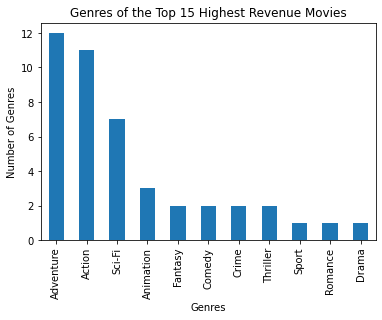

In [22]:
single_genre_series_values.plot.bar()

plt.xlabel('Genres')
plt.ylabel('Number of Genres')

plt.title('Genres of the Top 15 Highest Revenue Movies')

plt.show()

#creating a bar graph to show these top 15 movies genres

Looking at the next dataframe that included popularity and runtime minutes, I also got the top 15 movies with the highest popularity score. I then calculated the mean for the runtime minutes of these top 15 movies. I created a box and whisker plot to also show the representation of the runtime minues. 


In [23]:
merged_sorted_tmdb = merged_basics_tmdb.sort_values(by="popularity", ascending=False).head(15)

#grabbing the top 15 movies with the highest popularity scores

In [24]:
merged_sorted_tmdb['runtime_minutes'].describe()

count     15.000000
mean     132.600000
std       18.078401
min      101.000000
25%      119.500000
50%      133.000000
75%      142.500000
max      164.000000
Name: runtime_minutes, dtype: float64

In [25]:
merged_sorted_tmdb['runtime_minutes'].mean()

#getting the mean for the runtime minutes

132.6

In [26]:
list_merged_tmdb = merged_sorted_tmdb['runtime_minutes'].tolist()

#putting the top 15 runtime minutes in a list in order to make the box plot

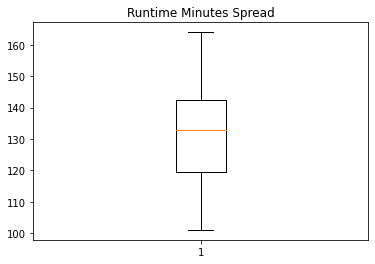

In [27]:
plt.boxplot(list_merged_tmdb)

plt.title ("Runtime Minutes Spread")

plt.show()

Looking at the last dataset by The Numbers, I wanted to see if there was a correlation between how much budget a movie studio puts in and the worldwide revenue that they make. I decided to look at the top 30 movies that earned the most profit. Profit is important to look at rather than just revenue as it takes into consideration how much the movie studio had invested and whether they made a good return on this. To model this, I got the correlation coefficient and also showed it in a scatter plot to visualise this correlation. I also looked at the average of the budget of these top 30 movies. 


In [28]:
top_30_movie_profit = tn_movie_budgets.sort_values(by="worldwide_minus_budget", ascending=False).head(30)

#getting the top 30 movies based on their profit

In [29]:
top_30_movie_profit['production_budget'].corr(top_30_movie_profit['domestic_worldwide'])

#getting the correlation coefficient number between budget and domestic + worldwide profit

0.7243593322161729

In [30]:
top_30_movie_profit['production_budget'].mean()

#the average of the top 30 movie budgets

192463333.33333334

Text(0.5, 1.0, 'Correlation between Budget & Revenue')

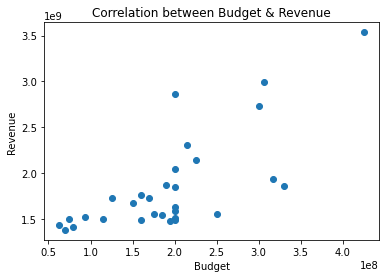

In [31]:
plt.scatter(top_30_movie_profit['production_budget'], top_30_movie_profit['domestic_worldwide'])

plt.xlabel('Budget')
plt.ylabel('Revenue')

plt.title('Correlation between Budget & Revenue')

#creating this into a scatter plot to show the correlation between budget and worldwide revenue

Evaluation and Results

From the IMDB and Box Office Mojo dataframe, a few conclusions could be made. Based on the highest revenue received, the top 15 movies included Avengers, Jurassic World, Furious 7, Black Panther, Frozen, Incredibles, The Fate of the Furious, Iron Man 3, Minions and Capitan America. The genres that these movies contained were adventure, animation, comedy, action, drama, family, sci-fi, fantasy, biography and history. While most movies could be associated with three genres, 12 out of the top 15 movies included adventure and 11 out of the top 15 included action, showing that these were the most common genres of the top movies. 

Looking at the next dataframe which included the popularity scores from TMDB, the movies with the highest popularity scores included Avengers, John Wick, Spiderman, The Hobbit, Blade Runner, Guardians of the Galaxy, Logan and Ralph Breaks the Internet. Upon looking at these movies, their runtimes ranged from 101 minutes to 164 minutes. The mean of these runtime minutes was 132 minutes, showing that this is the average time for movies with a high popularity score. Looking at the mean was appropriate for this range of data as there were no outliers. The mean and median were not far from each other, with the median being 133 minutes. 

Finally, looking at the last dataframe which included budgets and profits of movies, the movie Avatar was a standout in earning profit. The films that followed Avatar in earning profit were Star Wars, Titanic, Avengers and Jurassic World. After collecting the top 30 movies with the highest profit, the correlation coefficient between budget and total worldwide revenue was 0.73. This suggests that there is a positive correlation between budget and revenue which means that the more money invested in a movie, the more return it could potentially make. These movies invested an average of $192 million USD. 


Conclusions and Recommendations

From the findings, the following recommendations have been made for Microsoft. 

Recommendation One: To create a movie that includes the genres of adventure or action. These were the genres that the top movies. They can also include another genre such as comedy or sci-fi, as most movies could fall under two to three genres. 

Recommendation Two: Create a movie around 130 minutes. This was the average time for movies that had a high popularity score on TMDB. 

Recommendation Three: Due to there being a positive correlation between budget and revenue, it is recommended to invest around $192 million USD if a high return is wanted. 


Limitations and Future Analysis

Some of the limitations of this report is to do with the datasets. Merging different datasets meant that some databases included movies that were left out in others. This was the case between IMDB and Box Office Mojo. A few movies that were listed in the IMDB datasets were not in the Box Office Mojo datasets, and so this means some data from certain movies were not considered. A limitation of the dataset from TMDB that calculated popularity scores only had measured the popularity from people to visited the TMDB website or had accounts on this website. It did not consider that many people use platforms such as streaming sites to watch movies or look at information for movies on other websites. The years of when the movies were released did not include movies of more recent times which could be recommended to also look at.  

In the future, I could possibly look at actors and actresses that starred in the most popular films, and recommend that the company use them for their movies. I could also potentially look at the popularity of movies streamed online vs at the box office. 
